# Data Science Pragmatic programming in Python


Code snippets for quick consult (copy n paste)

In [2]:
import numpy as np
import pandas as pd

from scipy import stats

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

import IPython
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [3]:
!pwd

/home/leandroohf/Documents/leandro/ds_pragmatic_programming


## Generate data 

* random numbers generation
* generate data
* load data sets (toy)

http://scikit-learn.org/stable/datasets/index.html

### Gen random numbers

* uniform
* normal
* multivariate
* bolean
* integer

In [ ]:
## random numbers
np.random.seed(seed=2018)

# random boolean
b = np.random.uniform(size=3) > .5
b

# uniform
u = np.random.uniform(size=3)
u

# random int
i = np.random.randint(0,9,size=3)
i

# random choice
c = np.random.choice(['a','b','c','e'],size=7)
c

# normal
n = np.random.normal(size=5)
n

# multivariated normal 2d;
_mean = (1, 2)
_cov = [[1, 0], [0, 1]]
m = np.random.multivariate_normal(_mean, _cov, 3 )
m.shape
m

### Gen data for classifications and clustering

Shameless stolen from:
http://scikit-learn.org/stable/auto_examples/datasets/plot_random_dataset.html#sphx-glr-auto-examples-datasets-plot-random-dataset-py


* **make_classification** create multiclass datasets by allocating each class one or more **normally-distributed** clusters of points

   make_classification introducing noise by way of: correlated, redundant and uninformative features; multiple Gaussian clusters per class; and linear transformations of the feature space.

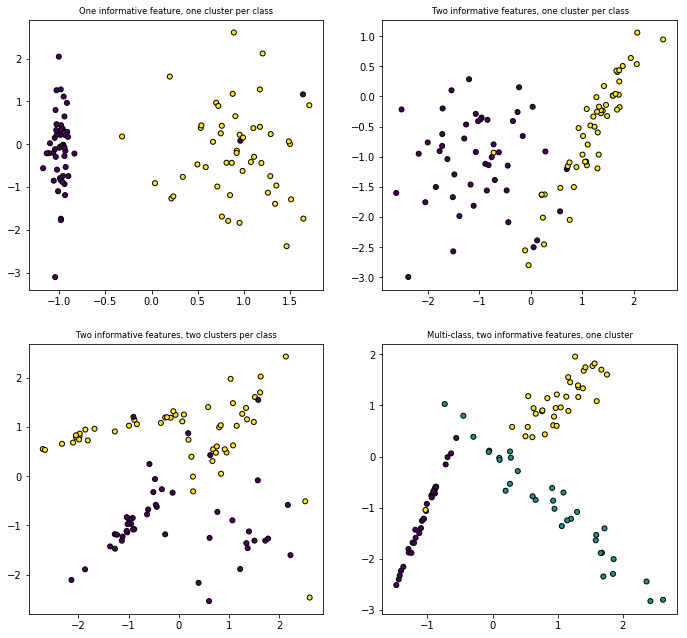

In [25]:
## classification (normal distributed)
from sklearn.datasets import make_classification

plt.figure(figsize=(10, 15));

plt.subplots_adjust(bottom=.05, top=.9, left=.05, right=.95);

X1, Y1 = make_classification(n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1)

plt.subplot(321);
plt.title("One informative feature, one cluster per class", fontsize='small');
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=25, edgecolor='k')

X1, Y1 = make_classification(n_features=2, n_redundant=0, n_informative=2,
                             n_clusters_per_class=1)

plt.subplot(322);
plt.title("Two informative features, one cluster per class", fontsize='small');

plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=25, edgecolor='k');


X2, Y2 = make_classification(n_features=2, n_redundant=0, n_informative=2)

plt.subplot(323);
plt.title("Two informative features, two clusters per class",
          fontsize='small');

plt.scatter(X2[:, 0], X2[:, 1], marker='o', c=Y2,
            s=25, edgecolor='k')


X1, Y1 = make_classification(n_features=2, n_redundant=0, n_informative=2,
                             n_clusters_per_class=1, n_classes=3)

plt.subplot(324);
plt.title("Multi-class, two informative features, one cluster",
          fontsize='small');

plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=25, edgecolor='k');

plt.show();

* **make_blobs**: Generate isotropic (uniformity in all orientations) Gaussian blobs for clustering. 

* **make_gaussian_quantiles**: Generate isotropic Gaussian and label samples by quantile

In [ ]:
## Blobs n gaussian qunatiles
from sklearn.datasets import make_blobs
from sklearn.datasets import make_gaussian_quantiles

X1, Y1 = make_blobs(n_features=2, centers=3, random_state=2018)

plt.figure(figsize=(11,5));

ax1 = plt.subplot(121);
plt.title("Three blobs", fontsize='small');
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=25, edgecolor='k');

X1, Y1 = make_gaussian_quantiles(n_features=2, n_classes=3,n_samples=256,random_state=2018)

ax2 = plt.subplot(122);
plt.title("Gaussian divided into three quantiles", fontsize='small');

plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=25, edgecolor='k');

ax2.set_xlim(-4,4);
ax2.set_ylim(-4,4);

plt.show()

* **make_circles**: Make a large circle containing a smaller circle in 2d.

* **make_moons**: Make two interleaving half circles

In [ ]:
## Clustering
from sklearn.datasets import make_moons, make_circles

X, y = make_circles(n_samples=400, factor=.3, noise=.05, random_state=2018)

# scatter plot of original and reduced data
fig = plt.figure(figsize=(9, 8));

ax1 = plt.subplot(121,aspect='equal');
ax1.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolor='k');
ax1.set_title("Circle Data (2d)");
ax1.set_xticks(());
ax1.set_yticks(());


X, y = make_moons(n_samples=400, noise=.05,random_state=2018)

ax2 = plt.subplot(122,aspect='equal');
ax2.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolor='k');
ax2.set_title("Moons Data (2d)");
ax2.set_xticks(());
ax2.set_yticks(());

plt.tight_layout();
plt.show;


### Load data sets


* **load_iris** Load and return the iris dataset (classification).

<img src="images/iris_petal_sepal.png" width="250" align="left"/>


In [ ]:
## datasets

from sklearn.datasets import load_iris

# Load the Iris flower dataset:
iris = load_iris()
X_iris = iris.data
Y_iris = iris.target

print('data size: {}'.format(X_iris.shape))
print('features: {}'.format(iris.feature_names))
print('labels: {}'.format(iris.target_names))

print()

plt.figure(2, figsize=(4, 3));
plt.clf();

# Plot 
plt.scatter(X_iris[:, 0], X_iris[:, 1], c=Y_iris, cmap=plt.cm.Set1,
            edgecolor='k');
plt.xlabel('Sepal length');
plt.ylabel('Sepal width');

* **load_boston**: Load and return the boston house-prices dataset (regression).

In [46]:
# Boston house pricing

from sklearn.datasets import load_boston

boston = load_boston()

print('data size: {}'.format(boston.data.shape))
print('features: {}'.format(boston.feature_names))

# convert to data frame (but may times is not necessary)
boston_df = pd.DataFrame(boston.data)
boston_df.columns = boston.feature_names

boston_df['target'] = boston.target

boston_df.head(4)

data size: (506, 13)
features: ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4


In [41]:
data = pd.read_csv('data/phone_data.csv')

data.shape
data.head(5)

(830, 7)

,index,date,duration,item,month,network,network_type
0,0,15/10/14 06:58,34.429,data,2014-11,data,data
1,1,15/10/14 06:58,13.000,call,2014-11,Vodafone,mobile
2,2,15/10/14 14:46,23.000,call,2014-11,Meteor,mobile
3,3,15/10/14 14:48,4.000,call,2014-11,Tesco,mobile
4,4,15/10/14 17:27,4.000,call,2014-11,Tesco,mobile


## Read and write data

* pandas
* dict
* file handle


### Pandas

* read from compressed csv
* read from sql db

In [ ]:
## load
creditcard_df = pd.read_csv('data/creditcard_downsampled.csv.tar.bz2', compression='bz2', 
                            sep=',', quotechar='"', index_col=False)

In [3]:
# reads form database
import pandas as pd
import sqlite3

#conn = sqlite3.connect("data/flights.db")
with sqlite3.connect("data/flights.db") as conn:
    df = pd.read_sql_query("select * from airlines limit 11;", conn)
    
df.head(3)

,index,id,name,alias,iata,icao,callsign,country,active
0,0,1,Private flight,\N,-,None,None,None,Y
1,1,2,135 Airways,\N,None,GNL,GENERAL,United States,N
2,2,3,1Time Airline,\N,1T,RNX,NEXTIME,South Africa,Y


In [5]:
df = pd.read_csv('data/phone_data.csv')
df.head(3)

,index,date,duration,item,month,network,network_type
0,0,15/10/14 06:58,34.429,data,2014-11,data,data
1,1,15/10/14 06:58,13.000,call,2014-11,Vodafone,mobile
2,2,15/10/14 14:46,23.000,call,2014-11,Meteor,mobile


### Basic and dict IO
 

In [ ]:
!rm -v data/output.tsv

* **Write txt file line by line**

In [21]:
# lazzy way
for k in range(0,3):
    
    if k % 2 == 0:
        print('Processing: {}'.format(k))

    score =  np.random.normal(size=1)[0]
    print("{k:d}\t{score:.2f}".format(k=k, score=score), file=open("data/output.tsv", "a"))

# better way
with open('data/output.txt', 'a') as f:
    for k in range(0,3):
    
        if k % 2 == 0:
            print('Processing: {}'.format(k))

        score =  np.random.normal(size=1)[0]
        print("{k:d}\t{score:.2f}".format(k=k, score=score), file=f)


Processing: 0
Processing: 2
Processing: 0
Processing: 2


In [ ]:
!cat data/output.tsv

In [3]:
import csv

my_dict = {'key1': 'value_a', 'key2': 1, 'key3': 2.0}

# write
with open('data/dict.csv', 'w') as f:
    [f.write('{0},{1}\n'.format(key, value)) for key, value in my_dict.items()];


# read
with open('data/dict.csv', 'r') as csv_file:
    
    reader = csv.reader(csv_file)
    my_dict2 = dict(reader)
    
my_dict2

[13, 7, 9]

{'key1': 'value_a', 'key2': '1', 'key3': '2.0'}

In [4]:
!cat data/dict.csv

key1,value_a
key2,1
key3,2.0


In [18]:
dict_list = [ {'key1': 1, 'key2': 'a'}, {'key1': 2, 'key2': 'b'}]

fieldnames = dict_list[0].keys()

# write
with open('data/people.csv', 'w') as output_file:
    dict_writer = csv.DictWriter(output_file, fieldnames=fieldnames)
    dict_writer.writeheader()
    dict_writer.writerows(dict_list)
    
# read
with open('data/people.csv', mode='r') as infile:
    
    reader = csv.reader(infile)
    _ = next(reader, None)  # skip the headers
    mydict = [{'key1': rows[0], 'key2': rows[1]} for rows in reader]
    
mydict

[{'key1': '1', 'key2': 'a'}, {'key1': '2', 'key2': 'b'}]

In [19]:
!cat data/people.csv

## Data wrangler (Remember, 80% of the project time is spent here)


[pandas cheat sheet](http://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)

### Summarize data


* descriptive (tables)
* groupby



#### Groupby



Split-Apply-Combine

<img src="images/split-apply-combine.png" width="400" align="left"/>


In [4]:
data = pd.read_csv('./data/phone_data.csv')

data.shape

data.head(5)

(830, 7)

,index,date,duration,item,month,network,network_type
0,0,15/10/14 06:58,34.429,data,2014-11,data,data
1,1,15/10/14 06:58,13.000,call,2014-11,Vodafone,mobile
2,2,15/10/14 14:46,23.000,call,2014-11,Meteor,mobile
3,3,15/10/14 14:48,4.000,call,2014-11,Tesco,mobile
4,4,15/10/14 17:27,4.000,call,2014-11,Tesco,mobile


In [5]:
# Group the data frame by month and item and extract a number of stats from each group
data.groupby(['month', 'item'], as_index=False).aggregate({
                                 'duration': [ 'std','median', sum, lambda d: d.mean()/(d.std()+1)],          # find the sum of the durations for each group
                                 'date':  'first',       # get the first date per group
                                 'network_type': ['nunique', 'count']
                                    })

month  item     duration                                           date  \
                           std   median        sum   <lambda>           first   
0   2014-11  call   387.128905   48.000  25547.000   0.615149  15/10/14 06:58   
1   2014-11  data     0.000000   34.429    998.441  34.429000  15/10/14 06:58   
2   2014-11   sms     0.000000    1.000     94.000   1.000000  16/10/14 22:18   
3   2014-12  call   324.731798   55.000  13561.000   0.526993  14/11/14 17:24   
4   2014-12  data     0.000000   34.429   1032.870  34.429000  13/11/14 06:58   
5   2014-12   sms     0.000000    1.000     48.000   1.000000  14/11/14 17:28   
6   2015-01  call   300.671661   55.500  17070.000   0.643008  15/12/14 20:03   
7   2015-01  data     0.000000   34.429   1067.299  34.429000  13/12/14 06:58   
8   2015-01   sms     0.000000    1.000     86.000   1.000000  15/12/14 19:56   
9   2015-02  call   329.672914   89.000  14416.000   0.650686  15/01/15 10:36   
10  2015-02  data     0.000000   34.429   1067.299  34.429000  13/01/15 06:58   
11  2015-02   sms     0.000000    1.000     39.000   1.000000  15/01/15 12:23   
12  2015-03  call  1552.192218  107.000  21727.000   0.297630  12/02/15 20:15   
13  2015-03  data     0.000000   34.429    998.441  34.429000  13/02/15 06:58   
14  2015-03   sms     0.000000    1.000     25.000   1.000000  19/02/15 18:46   

   network_type        
        nunique count  
0             3   107  
1             1    29  
2             2    94  
3             3    79  
4             1    30  
5             2    48  
6             3    88  
7             1    31  
8             1    86  
9             3    67  
10            1    31  
11            2    39  
12            3    47  
13            1    29  
14            2    25

#### crosstab

In [10]:
pd.crosstab(data.network_type, data.item, margins=True, margins_name="Total")

pd.crosstab(data.network_type, data.item, normalize=True)

item,call,data,sms,Total
network_type,,,,
data,0,150,0,150
landline,42,0,0,42
mobile,319,0,282,601
special,0,0,3,3
voicemail,27,0,0,27
world,0,0,7,7
Total,388,150,292,830


item,call,data,sms
network_type,,,
data,0.000000,0.180723,0.000000
landline,0.050602,0.000000,0.000000
mobile,0.384337,0.000000,0.339759
special,0.000000,0.000000,0.003614
voicemail,0.032530,0.000000,0.000000
world,0.000000,0.000000,0.008434


**comparing with groub by and pivot table**

crosstabe is more easy to read and do not have the extr steps

In [13]:
pd.crosstab(data.network_type, data.item)

data.groupby(['network_type', 'item'])['network_type'].count().unstack().fillna(0)

data.pivot_table(index='item', columns='network_type', aggfunc={'network_type':len}, fill_value=0)


item,call,data,sms
network_type,,,
data,0,150,0
landline,42,0,0
mobile,319,0,282
special,0,0,3
voicemail,27,0,0
world,0,0,7


item,call,data,sms
network_type,,,
data,0.0,150.0,0.0
landline,42.0,0.0,0.0
mobile,319.0,0.0,282.0
special,0.0,0.0,3.0
voicemail,27.0,0.0,0.0
world,0.0,0.0,7.0


network_type                                        
network_type         data landline mobile special voicemail world
item                                                             
call                    0       42    319       0        27     0
data                  150        0      0       0         0     0
sms                     0        0    282       3         0     7

#### pivot table

http://pbpython.com/pandas-pivot-table-explained.html



<img src="images/pivot-table-datasheet.png" width="500" align="left"/>

In [18]:
table = pd.pivot_table(data,index=["item","network_type"],
               values=["duration"],
               aggfunc=[np.sum,np.mean],fill_value=0,margins=True)

table


sum        mean
                   duration    duration
item network_type                      
call landline      18433.00  438.880952
     mobile        72113.00  226.059561
     voicemail      1775.00   65.740741
data data           5164.35   34.429000
sms  mobile          282.00    1.000000
     special           3.00    1.000000
     world             7.00    1.000000
All                97777.35  117.804036

In [20]:
table.query('network_type == ["data", "sms", "mobile"]')

,,sum,mean
,,duration,duration
item,network_type,,
call,mobile,72113.00,226.059561
data,data,5164.35,34.429000
sms,mobile,282.00,1.000000


#### left , right n inner join


| Merge method | SQL Join Name    | Description                               |  
|--------------|----------------- |-------------------------------------------|  
| left         | LEFT OUTER JOIN  | Use keys from left frame only             |  
| right        | RIGHT OUTER JOIN | Use keys from right frame only            |  
| outer        | FULL OUTER JOIN  | Use union of keys from both frames        |  
| inner        | INNER JOIN       | Use intersection of keys from both frames |



In [5]:
left = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                     'key2': ['K0', 'K1', 'K0', 'K1'],
                     'A': ['A0', 'A1', 'A2', 'A3'], 
                     'B': ['B0', 'B1', 'B2', 'B3']})


right = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                      'key2': ['K0', 'K0', 'K0', 'K0'],  
                      'C': ['C0', 'C1', 'C2', 'C3'],
                      'D': ['D0', 'D1', 'D2', 'D3']})



result = pd.merge(left, right, how='left', on=['key1', 'key2'])

left

right

result

,key1,key2,A,B
0,K0,K0,A0,B0
1,K0,K1,A1,B1
2,K1,K0,A2,B2
3,K2,K1,A3,B3


,key1,key2,C,D
0,K0,K0,C0,D0
1,K1,K0,C1,D1
2,K1,K0,C2,D2
3,K2,K0,C3,D3


,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN


### Path manipulations

http://pbpython.com/pathlib-intro.html


<img src="images/pathlib_cheatsheet_p1.png" width="600" align="left"/>

In [24]:
from pathlib import Path

in_file_1 = Path.cwd() / "in" / "input.xlsx"

p = Path.cwd()


print('logical checks: is a dir , is a file?')
p.is_dir()

p.is_file()


print('Get parts (split)')
p.parts


print('paths, parents ...')
p.absolute()

p.parent

p.as_uri()


logical checks: is a dir , is a file?


True

False

Get parts (split)


('/', 'media', 'leandroohf', 'sdb1', 'leandro', 'ds_pragmatic_programming')

paths, parents ...


PosixPath('/media/leandroohf/sdb1/leandro/ds_pragmatic_programming')

PosixPath('/media/leandroohf/sdb1/leandro')

'file:///media/leandroohf/sdb1/leandro/ds_pragmatic_programming'

### String manipulation 


* basic string manipulation
* vectorized string manipulation
  (take notes of the pros n crons)
    
    https://jakevdp.github.io/PythonDataScienceHandbook/03.10-working-with-strings.html
        

### High performance eval n query

https://jakevdp.github.io/PythonDataScienceHandbook/03.12-performance-eval-and-query.html

Motivations
for large df n arrays eval n query are faster


## Time Series

https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html


### Data wrangler

#### Date manipulation

In [10]:
from datetime import datetime
from dateutil import parser

date = datetime(year=2015, month=7, day=4)
date

date = parser.parse("4th of July, 2015")
date

date = pd.to_datetime("4th of July, 2015")
date


date = np.array('2015-07-04', dtype=np.datetime64)
date

date + np.arange(3)


datetime.datetime(2015, 7, 4, 0, 0)

datetime.datetime(2015, 7, 4, 0, 0)

array('2015-07-04', dtype='datetime64[D]')

array(['2015-07-04', '2015-07-05', '2015-07-06'], dtype='datetime64[D]')

Timestamp('2015-07-04 00:00:00')

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06'], dtype='datetime64[ns]', freq=None)

**Pandas freq meanings**

* D	Calendar day	
* W	Weekly		
* M	Month end	
* Q	Quarter end	
* A	Year end	
* H	Hours	
* T	Minutes		
* S	Seconds		
* L	Milliseonds		
* U	Microseconds		
* N	nanoseconds
* B	Business day
* BM	Business month end
* BQ	Business quarter end
* BA	Business year end
* BH	Business hours

In [16]:
pd.date_range('2015-07-03', periods=3, freq='D')

pd.period_range('2015-11', periods=3, freq='M')

pd.timedelta_range(0, periods=3, freq='H')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05'], dtype='datetime64[ns]', freq='D')

PeriodIndex(['2015-11', '2015-12', '2016-01'], dtype='period[M]', freq='M')

TimedeltaIndex(['00:00:00', '01:00:00', '02:00:00'], dtype='timedelta64[ns]', freq='H')

#### Rolling windows (TODO)
https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html

### Time series visualization (TODO)

In [20]:
# TODO



## Geo located data

## Visualizations
WIP

https://plot.ly/python/ipython-notebook-tutorial/

about license offiline plotly
https://stackoverflow.com/questions/35511111/plotly-python-totally-free

1. free
2. open source

All the libraries API; Matlab, Python n R alwasy were free. pltly.js only form 2015

The Accounts you can create on their website are just to host graphs online. Like with a free account you can host one private graph, with a professional account you can host unlimited private/public graphs



================
* Interactive plots  (good to examine the data)
    1. Sactter plot
    2. Boxplot per category n try the width is sample size
    3. Histograms subplot
    4. financial data https://help.plot.ly/make-a-candlestick/ candles and select periodo tool
    5. maps (geo located plots)
    6. tables with filters 
    7. mini plot inside a plot https://help.plot.ly/getting-data/
    8. network graphs: https://plot.ly/python/network-graphs/

* Analysis plots
    1. correlation matrix with scatter plot
    2. 

### Load data

In [6]:
from sklearn.datasets import load_iris

# Load the Iris flower dataset:
iris = load_iris()

iris_df = pd.DataFrame(iris.data)
iris_df.columns = iris.feature_names

iris_df['target'] = iris.target

iris_df['target_name'] = iris_df.target.map(lambda t: iris.target_names[int(t)])

iris_df.columns
iris_df.head(3)

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target', 'target_name'],
      dtype='object')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa


### Boxplot

plotly does not support boxplot width proportional to variable or sample size

In [8]:
## offline plot
import plotly
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)

data = []

for tn in iris_df.target_name.unique():
    
    df = iris_df[iris_df.target_name == tn]
    print('size of group {}: {}'.format(tn, df.shape[0]))
    
    data.append(  go.Box( y=df['sepal length (cm)'] , name=str(tn), showlegend=False ) )

plotly.offline.iplot(data)

size of group setosa: 50
size of group versicolor: 50
size of group virginica: 50


In [11]:
data = []

for tn in iris_df.target_name.unique():
    
    df = iris_df[iris_df.target_name == tn]
    print('size of group {}: {}'.format(tn, df.shape[0]))
    
    data.append(  go.Box( x=df['sepal length (cm)'] , name=str(tn), showlegend=False ) )

plotly.offline.iplot(data)

size of group setosa: 50
size of group versicolor: 50
size of group virginica: 50


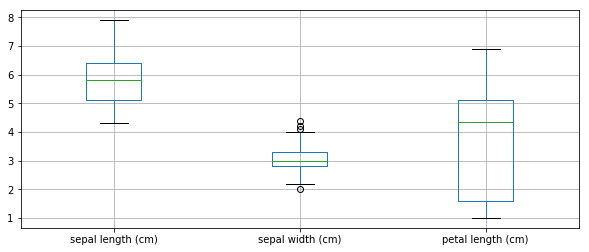

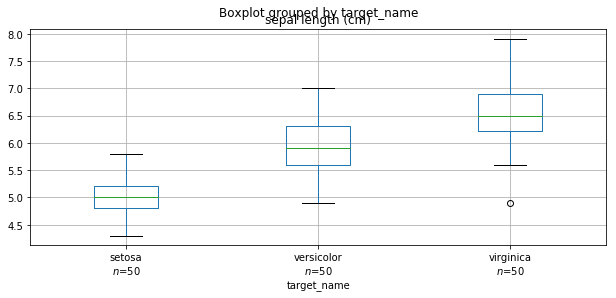

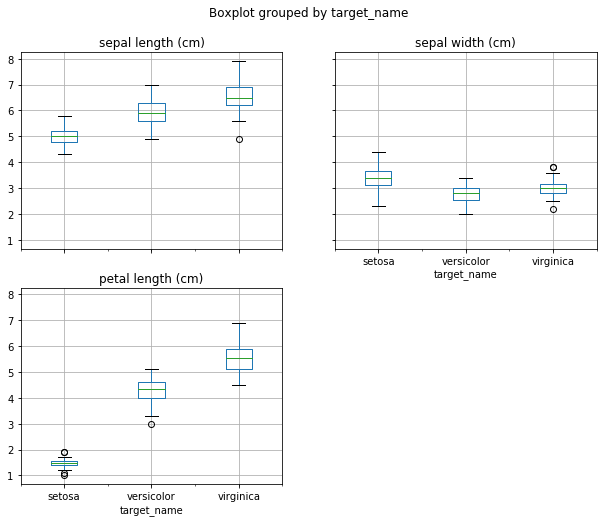

In [12]:
iris_df.boxplot(column=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)'],
               figsize=(10,4));

print()
# The iris is not a good example for this visualization because the classes are balanced
# This is better in ggplot n R
dfg = iris_df.groupby('target_name')

counts = [len(v) for k, v in dfg]
total = float(sum(counts))
cases = len(counts)

widths = [c/total for c in counts] 

ax = iris_df.boxplot(by='target_name', 
                column=['sepal length (cm)'],
                widths=widths,
                   figsize=(10,4));

ax.set_xticklabels(['%s\n$n$=%d'%(k, len(v)) for k, v in dfg])

print()
ax = iris_df.boxplot(by='target_name', 
                column=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)'],
               figsize=(10,8));

### Histograms

In [9]:
x = iris_df['sepal length (cm)']
data = [ go.Histogram(x=x, nbinsx=8) ]

# trace3 = go.Histogram(
#     x=x,
#     xbins=dict(
#         start='1969-11-15',
#         end='1972-03-31',
#         size= 'M18'),
#     autobinx = False
# )

plotly.offline.iplot(data)

In [12]:
hist, bin_edges = np.histogram(iris_df['sepal length (cm)'], density=True)


hist
bin_edges

array([0.16666667, 0.42592593, 0.25925926, 0.5       , 0.2962963 ,
       0.48148148, 0.33333333, 0.11111111, 0.09259259, 0.11111111])

array([4.3 , 4.66, 5.02, 5.38, 5.74, 6.1 , 6.46, 6.82, 7.18, 7.54, 7.9 ])

In [13]:
x0 = np.random.randn(500)
x1 = np.random.randn(500) + 1.5

trace1 = go.Histogram(
    x=x0,
    opacity=0.75
)

trace2 = go.Histogram(
    x=x1,
    opacity=0.75
)

data = [ trace1, trace2 ]
layout = go.Layout(barmode='overlay')
fig = go.Figure(data=data, layout=layout)

plotly.offline.iplot(data)

### Subplot

### Scatter plot

* text
* vline n hline
* legends
* xlabel n ylabel
* title


## Model Trainning



* Model tunning
    1. gridseach
    2. sthocastic search


### Evaluation metrics

#### Accuracy  and confusion matrix

In [3]:
## Accuracy 

from sklearn.metrics import accuracy_score, confusion_matrix
from tabulate import tabulate

np.random.seed(2018)

y_true = np.random.uniform(size=7) > .5
y_pred = np.random.uniform(size=7) > .4

acc = accuracy_score(y_true, y_pred)
print('Fake data')
print('y_true: {}'.format(y_true))
print('y_pred: {}'.format(y_pred))

print('accuracy: {}'.format(acc))

cf_m = confusion_matrix(y_true, y_pred)

cf_df = pd.DataFrame(cf_m, index=["Actual Positive", "Actual Negative"], columns = ["Predicted Positive", "Predicted Negative"])
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

FPR = fp/(fp+tn)
FNR = fn/(tp+fn)

print(tabulate(cf_df, tablefmt="orgtbl",
               headers="keys"))


print()
print('FPR: {}'.format(FPR))
print('FNR: {}'.format(FNR))

print()


Fake data
y_true: [ True False  True False False  True  True]
y_pred: [ True  True False  True  True  True False]
accuracy: 0.2857142857142857
|                 |   Predicted Positive |   Predicted Negative |
|-----------------+----------------------+----------------------|
| Actual Positive |                    0 |                    3 |
| Actual Negative |                    2 |                    2 |

FPR: 1.0
FNR: 0.5



=================================

For markdwon cells, insert the code in a markdown cell. 

```python
\{\{print(tabulate(cf_df, headers="keys", tablefmt="html"))\}\}
```


{{print(tabulate(cf_df, headers="keys", tablefmt="html"))}}


#### Precision Recall Curve, AUC and F score


#####  Downsampling data example

Does need to run one time int he case we do not have data/creditcard_downsampled.csv.tar.bz2.

Also is an example of downsampling data.

Data downloaded from:
https://www.kaggle.com/mlg-ulb/creditcardfraud


* The original imbalance ratio (492:284315): 0.002
* Downsample the majority to reach the ratio 1:3 , just to have small data set

In [ ]:
## Does not need to run this again once you have credicard_downsampled.csv.tar.bz2
creditcard_df = pd.read_csv('data/creditcard.csv.zip', compression='zip', sep=',', quotechar='"')

creditcard_df.sample(3).head(3)

n_pos = np.sum(creditcard_df.Class == True)
print('#positives: {}'.format(n_pos))

n_neg = np.sum(creditcard_df.Class == False)
print('#negatives: {}'.format(n_neg))

r = n_pos/(n_pos + n_neg)
print('Imbalance data ratio ({0}:{1}): {2:.3f}'.format(n_pos,n_neg,r))

downsample both class to have smaller dataset

In [ ]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = creditcard_df[creditcard_df.Class==0]
df_minority = creditcard_df[creditcard_df.Class==1]
 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=2000,     # to match minority class
                                 random_state=123) # reproducible results
 

# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
df_downsampled = df_downsampled.reset_index(drop=True)


# Saving
df_downsampled.to_csv('data/creditcard_downsampled.csv', index=False)

In [ ]:
%%bash

# remove old file
rm -v data/creditcard_downsampled.csv.tar.bz2 
tar -cjvf  data/creditcard_downsampled.csv.tar.bz2 data/creditcard_downsampled.csv

rm -v data/creditcard_downsampled.csv

du -sh data/*

##### Load downsampled data

In [6]:
## load
creditcard_df = pd.read_csv('data/creditcard_downsampled.csv.tar.bz2', compression='bz2', 
                            sep=',', quotechar='"', index_col=False)

creditcard_df = creditcard_df.dropna()
creditcard_df[['Class','Amount']].describe()

creditcard_df['Class'] = creditcard_df.Class.astype(int)

creditcard_df.sample(3).head(3)

n_pos = np.sum(creditcard_df.Class == True)
print('#positives: {}'.format(n_pos))

n_neg = np.sum(creditcard_df.Class == False)
print('#negatives: {}'.format(n_neg))

r = n_pos/(n_pos + n_neg)
print('Imbalance data ratio ({0}:{1}): {2:.3f}'.format(n_pos,n_neg,r))

,Class,Amount
count,2492.000000,2492.000000
mean,0.197432,97.498427
std,0.398141,224.284179
min,0.000000,0.000000
25%,0.000000,3.597500
50%,0.000000,21.030000
75%,0.000000,89.990000
max,1.000000,3249.730000


,data/creditcard_downsampled.csv,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
314,66360.0,-0.857350,0.127830,3.748614,2.542093,-1.032970,1.012139,-0.118369,0.284106,0.584708,...,0.174886,0.917499,-0.105810,0.752113,0.048024,0.177793,-0.025082,-0.088395,89.77,0
272,143287.0,1.415206,-1.132289,-2.227964,0.218964,0.711225,0.738274,0.414529,0.141893,0.432068,...,0.338770,0.536898,-0.202986,-1.625138,-0.006509,-0.114333,-0.048306,-0.044282,282.66,0
817,126766.0,-3.545717,2.514367,0.341468,-1.752160,0.577088,-0.982154,1.056871,-0.210027,1.566596,...,-0.681595,-0.947778,-0.432949,-0.002672,1.017919,0.233174,0.869123,0.550666,4.47,0


#positives: 492
#negatives: 2000
Imbalance data ratio (492:2000): 0.197


#### Training 2 models

In [7]:
from sklearn.model_selection import train_test_split

X = creditcard_df[creditcard_df.columns[:-1]]
y = creditcard_df[creditcard_df.columns[-1]]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2018, test_size=0.3)


In [8]:
# random forests
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

rf = RandomForestClassifier(n_estimators = 15,max_depth=5,
                            random_state=0).fit(X_train, y_train)


lr = LogisticRegression().fit(X_train, y_train)


#### Precision n Recall Curves

Imbalance data ratio (492:2000): 0.197


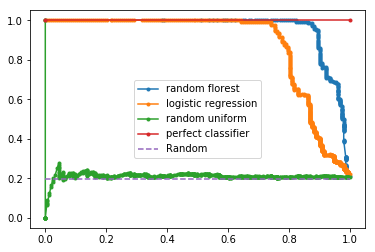

In [9]:
from sklearn.metrics import precision_recall_curve


y_true = y_test > 0.5
y_score_rf = rf.predict_proba(X_test)[:,-1]
y_score_lr = lr.predict_proba(X_test)[:,-1]
np.random.seed(2018)
y_score_rd = np.random.uniform(size=y_test.shape[0])
y_score_perfect = y_test

r = n_pos/(n_pos + n_neg)
print('Imbalance data ratio ({0}:{1}): {2:.3f}'.format(n_pos,n_neg,r))

precision1, recall1, thrs1 = precision_recall_curve(y_true, y_score_rf)

precision2, recall2, thrs2 = precision_recall_curve(y_true, y_score_lr)

precision3, recall3, thrs3 = precision_recall_curve(y_true, y_score_rd)

precision4, recall4, thrs4 = precision_recall_curve(y_true, y_score_perfect)


plt.plot(recall1, precision1, marker='.',label='random florest');
plt.plot(recall2, precision2, marker='.', label='logistic regression');
plt.plot(recall3, precision3, marker='.', label='random uniform');
plt.plot(recall4, precision4, marker='.', label='perfect classifier');
plt.plot([0, 1], [r, r], linestyle='--',label='Random');
plt.legend();
                                              

In [10]:
# TODO: implement this later better. Give the options to pass multiple model for comparison
def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    
    plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
    plt.plot(thresholds, recalls[:-1], 'g--', label = 'recall')
    plt.xlabel('Threshold')
    plt.legend(loc='upper left')
    plt.ylim([0,1])
    

AUCPRC: 0.9584156721781121
f1 score: 0.9665775401069518


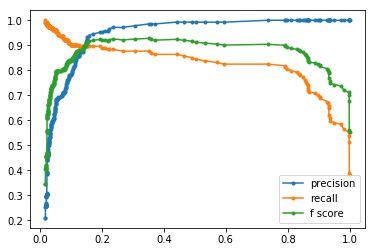

In [11]:
from sklearn.metrics import f1_score, auc

area = auc(recall1, precision1)

f = f1_score(y_true, y_score_rf > 0.5 , average='micro')

print('AUCPRC: {}'.format(area))
print('f1 score: {}'.format(f))


# precision_recall_curve returns precision  and recall as a array od shape = [n_thresholds + 1] 
thrs1.shape
recall1.shape
precision1.shape

precision = precision1[:-1]
recall = recall1[:-1]

precision.shape
recall.shape

f_scores = 2 * (precision * recall) / (precision + recall)

plt.plot(thrs1, precision, marker='.',label='precision');
plt.plot(thrs1, recall, marker='.', label='recall');
plt.plot(thrs1, f_scores, marker='.', label='f score');
plt.legend();

#### EER: Equal error

In [15]:
from sklearn.metrics import roc_curve


fpr1, tpr1, thr1 = roc_curve(y_true, y_score_rf)
fnr1 = 1.0 - tpr1


EER1_pos = np.argmin(abs(fnr1-fpr1))
EER1_thr1 = thr1[EER1_pos]

print('thr @ EER: {}'.format(EER1_thr1))
print('fpr @ EER: {}'.format(fpr1[EER1_pos]))
print('fnr @ EER: {}'.format(fnr1[EER1_pos]))


thr @ EER: 0.09090308538043898
fpr @ EER: 0.07407407407407407
fnr @ EER: 0.07792207792207795
